This notebook contains checks and histograms of different distance and dynamical measures for patternWalker. We want to check if the walker behaves as expected in certain situations.  
At the end of the notebook, we show an idea for a transient process, that can perhaps be used to approximate the patternWalker in the vincinity of its target when the process is not stopped upon the hitting event. 

In [1]:
import random_walker as rw
import utils
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 60}

mpl.rc('font', **font)

In [2]:
#offspring_factor=2
#height=5
#H=nx.generators.classic.balanced_tree(offspring_factor,height)
#root=utils.list_degree_nodes(H,offspring_factor,1)[0]
#H,_=utils.directify(H,root)

In [14]:
def make_tree(lam,pattern_len,flip_rate,overlap):
    H,root=utils.poisson_ditree(lam)
    G=rw.sectionedPatternWalker(H.copy(),root,pattern_len,flip_rate,overlap)
    G.set_weights()
    return H,root,G

make_tree=utils.seed_decorator(make_tree,0)

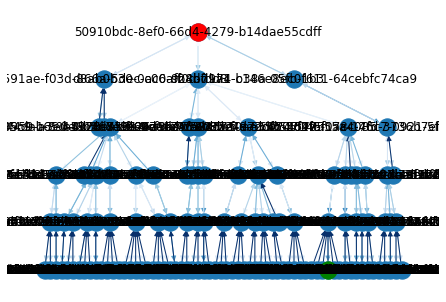

In [15]:
#Create patternWalker based on the above tree.
pattern_len=15 #String/pattern length
flip_rate=5/pattern_len #5/pattern_len #Bit flipping rate for propagating patterns
lam=2.0
overlap=0.
H,root,G=make_tree(lam,pattern_len,flip_rate,overlap)
#G.set_weights()
pos=graphviz_layout(H,prog='dot')
(edges,weights) = zip(*nx.get_edge_attributes(G,'weight').items())
nx.draw(G, pos, edgelist=edges, edge_color=weights, width=1.0, edge_cmap=plt.cm.Blues)
nx.draw_networkx_nodes(G,pos,nodelist=[root],node_color='r')
nx.draw_networkx_nodes(G,pos,nodelist=[G.target_node],node_color='g')
nx.draw_networkx_labels(G,pos)
plt.show()

In [16]:
print(G.sections)

[(0, 15), (15, 30), (30, 45)]


In [17]:
print('Number of duplicate strings/Number of strings:', G.num_pattern_duplicates(),'/',len(G))
print('target node:', G.target_node)
#mfpts_root_leaves=utils.mfpt(G,[(root,b) for b in utils.leaves(G.hierarchy_backup)])
#mfpts_root_leaves

Number of duplicate strings/Number of strings: 2 / 125
target node: 3acaaf82-374a-6cc9-e039-7e67926146de


In [7]:
#While the walker is walking, track the distance of the local pattern to the target pattern, as well as the 
#distance between the current location to the target on the graph.
#In case we want to begin at the target and examine the local behaviour, uncomment next line:
#G.x=G.target_node.copy()
pattern_distances=[]
graph_distances=[]
for _ in range(5000):
    G.step()
    pattern_distances.append( G.metric(G.target_pattern,G.nodes[G.x]['pattern']) )
    graph_distances.append( nx.shortest_path_length(G,G.target_node,G.x) )
print('Correlation between pattern and on-graph distance:', np.corrcoef(pattern_distances,graph_distances)[0,1])

Correlation between pattern and on-graph distance: 0.5063874890678267


In [8]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 60}

mpl.rc('font', **font)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


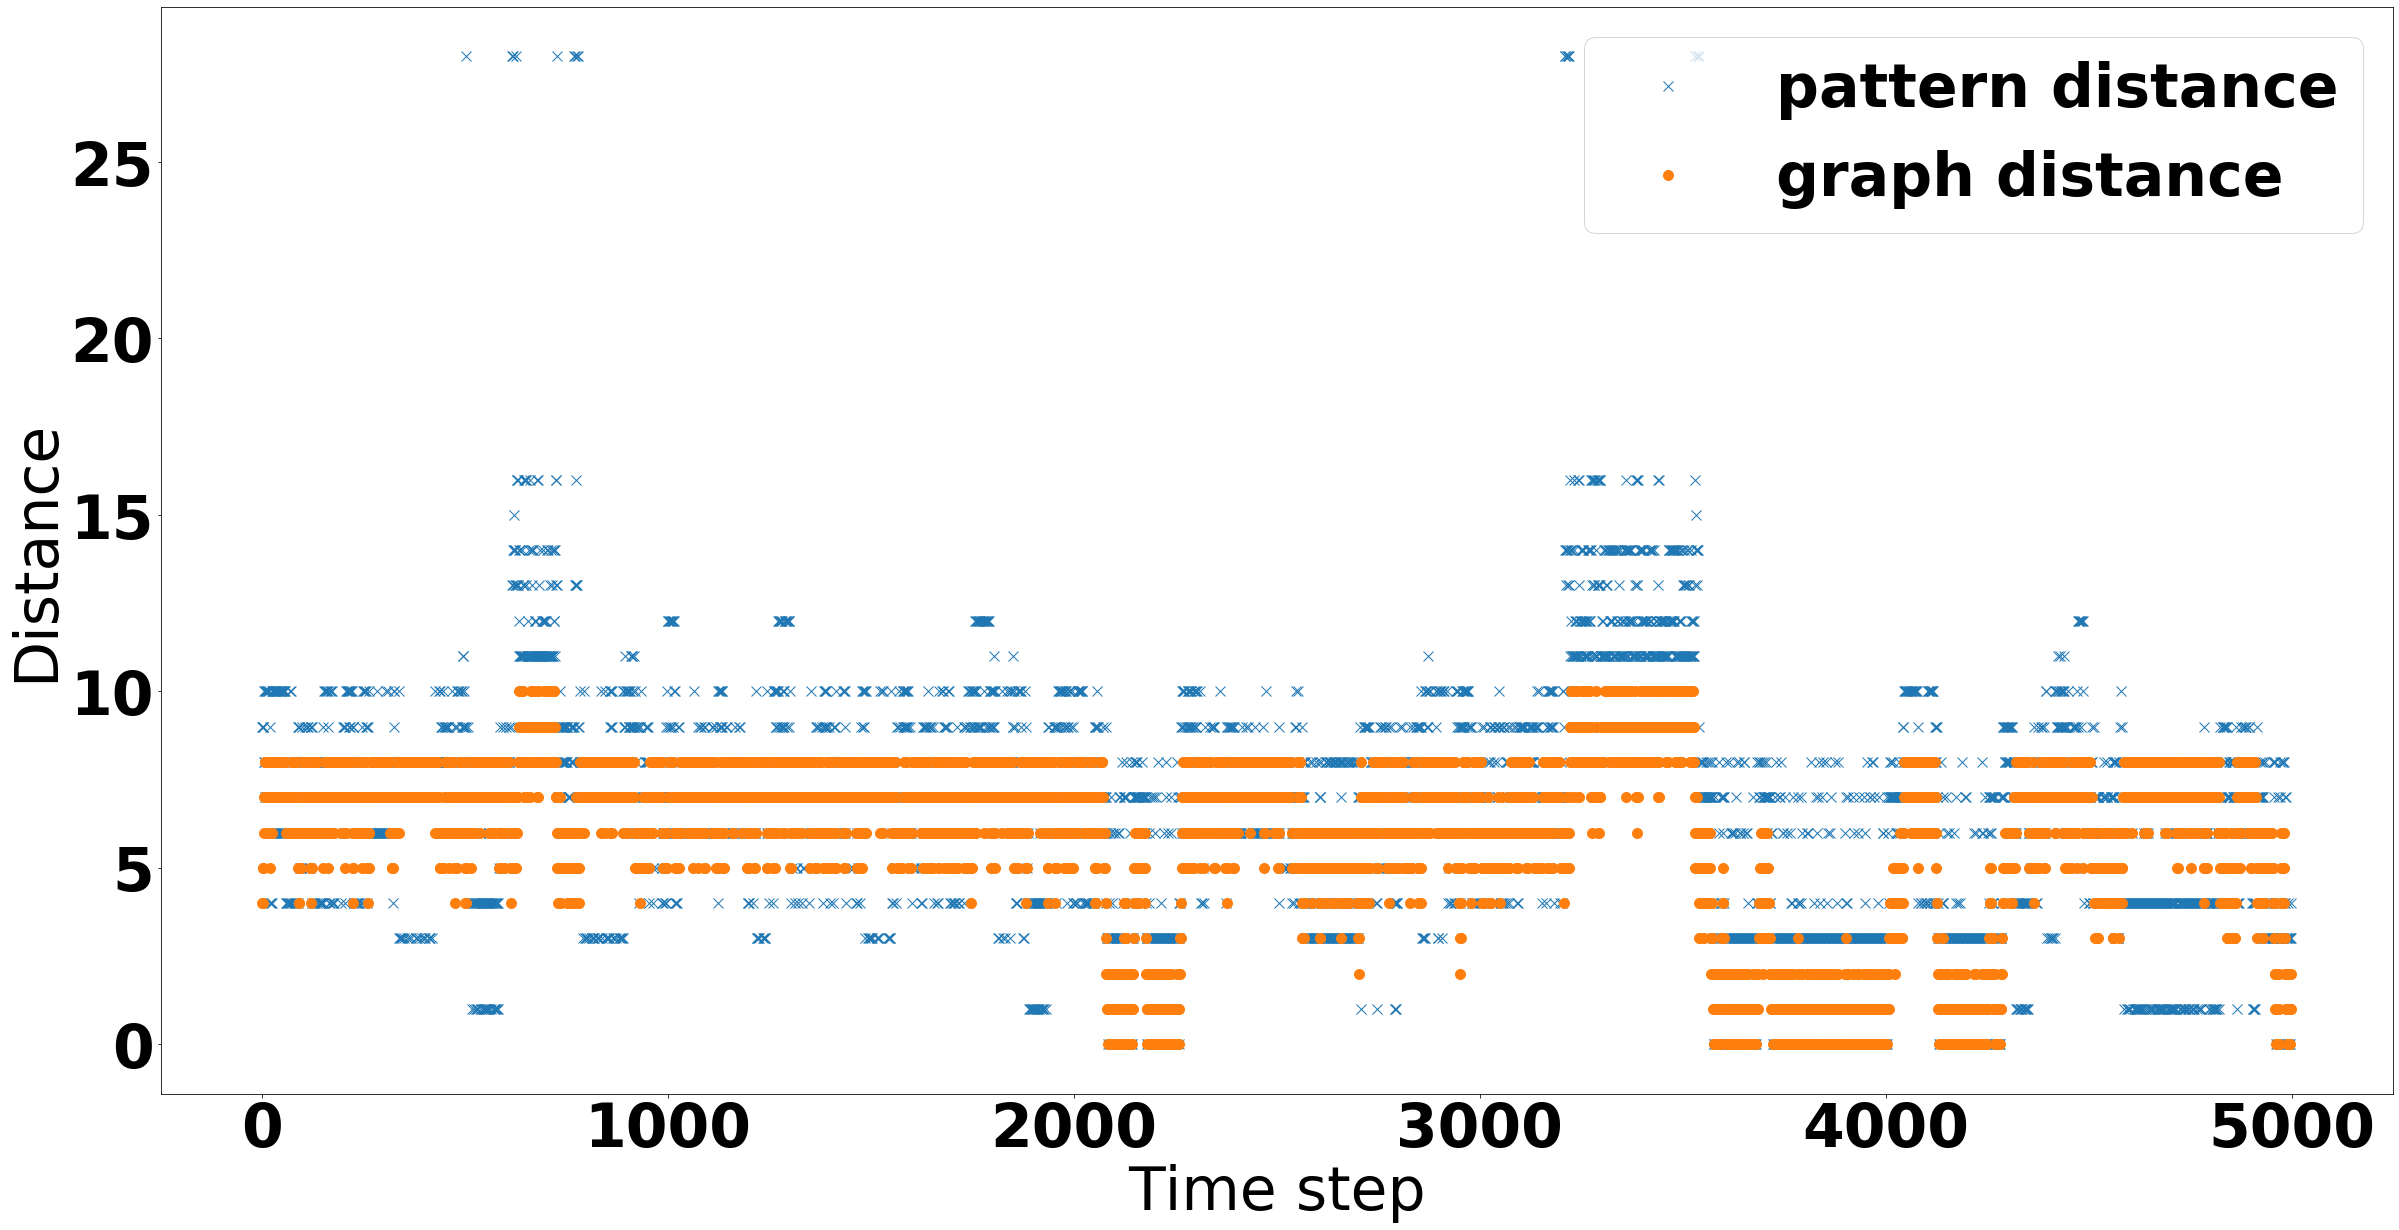

In [9]:
plt.figure(figsize=(40,20))
plt.plot(pattern_distances,'x',ms=10, label='pattern distance')
plt.plot(graph_distances,'o',ms=10, label='graph distance')
plt.legend(loc='best')
plt.xlabel('Time step')
plt.ylabel('Distance')
#plt.savefig('./outputs/demonstrations/pattern_and_graph_distances.png')
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


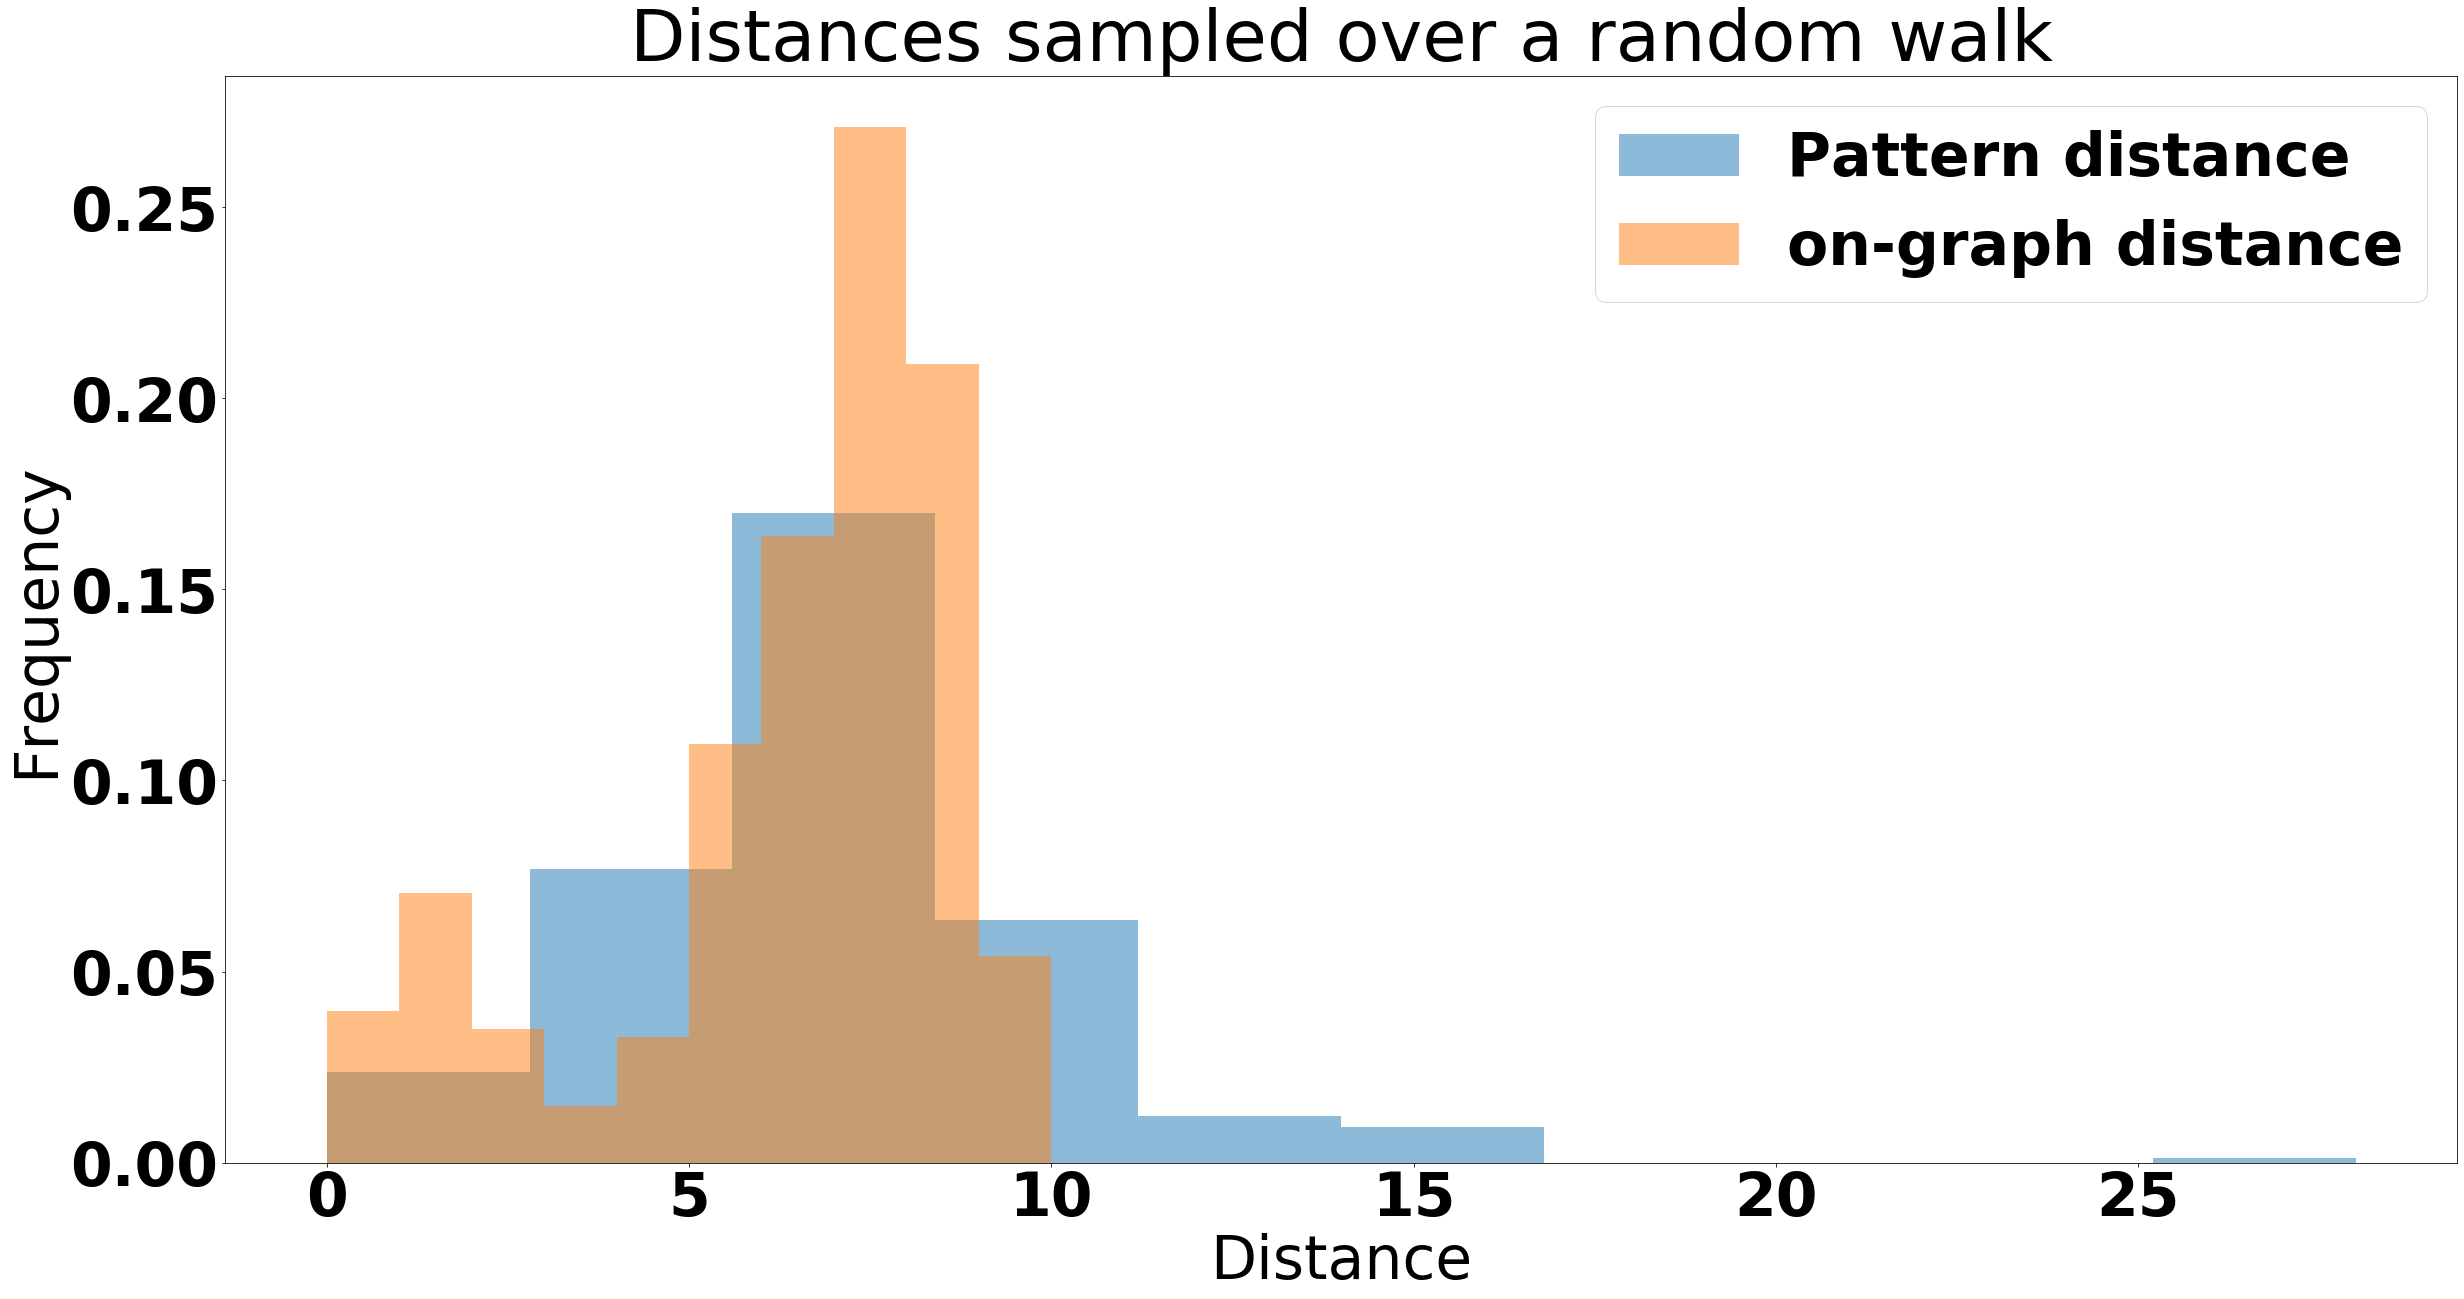

In [10]:
plt.figure(figsize=(40,20))
plt.hist(pattern_distances,density=True,alpha=0.5,label='Pattern distance')
plt.hist(graph_distances,density=True,alpha=0.5,label='on-graph distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distances sampled over a random walk')
plt.legend(loc='best')
#plt.savefig('./outputs/demonstrations/hist_rw_distances.png')
plt.show()

In [11]:
#Do the same as above, but not evaluated on a random path, but for every node once
all_pattern_distances=[G.metric(G.nodes[x]['pattern'],G.target_pattern) for x in G.nodes]
all_graph_distances=[nx.shortest_path_length(G,x,G.target_node) for x in G.nodes]

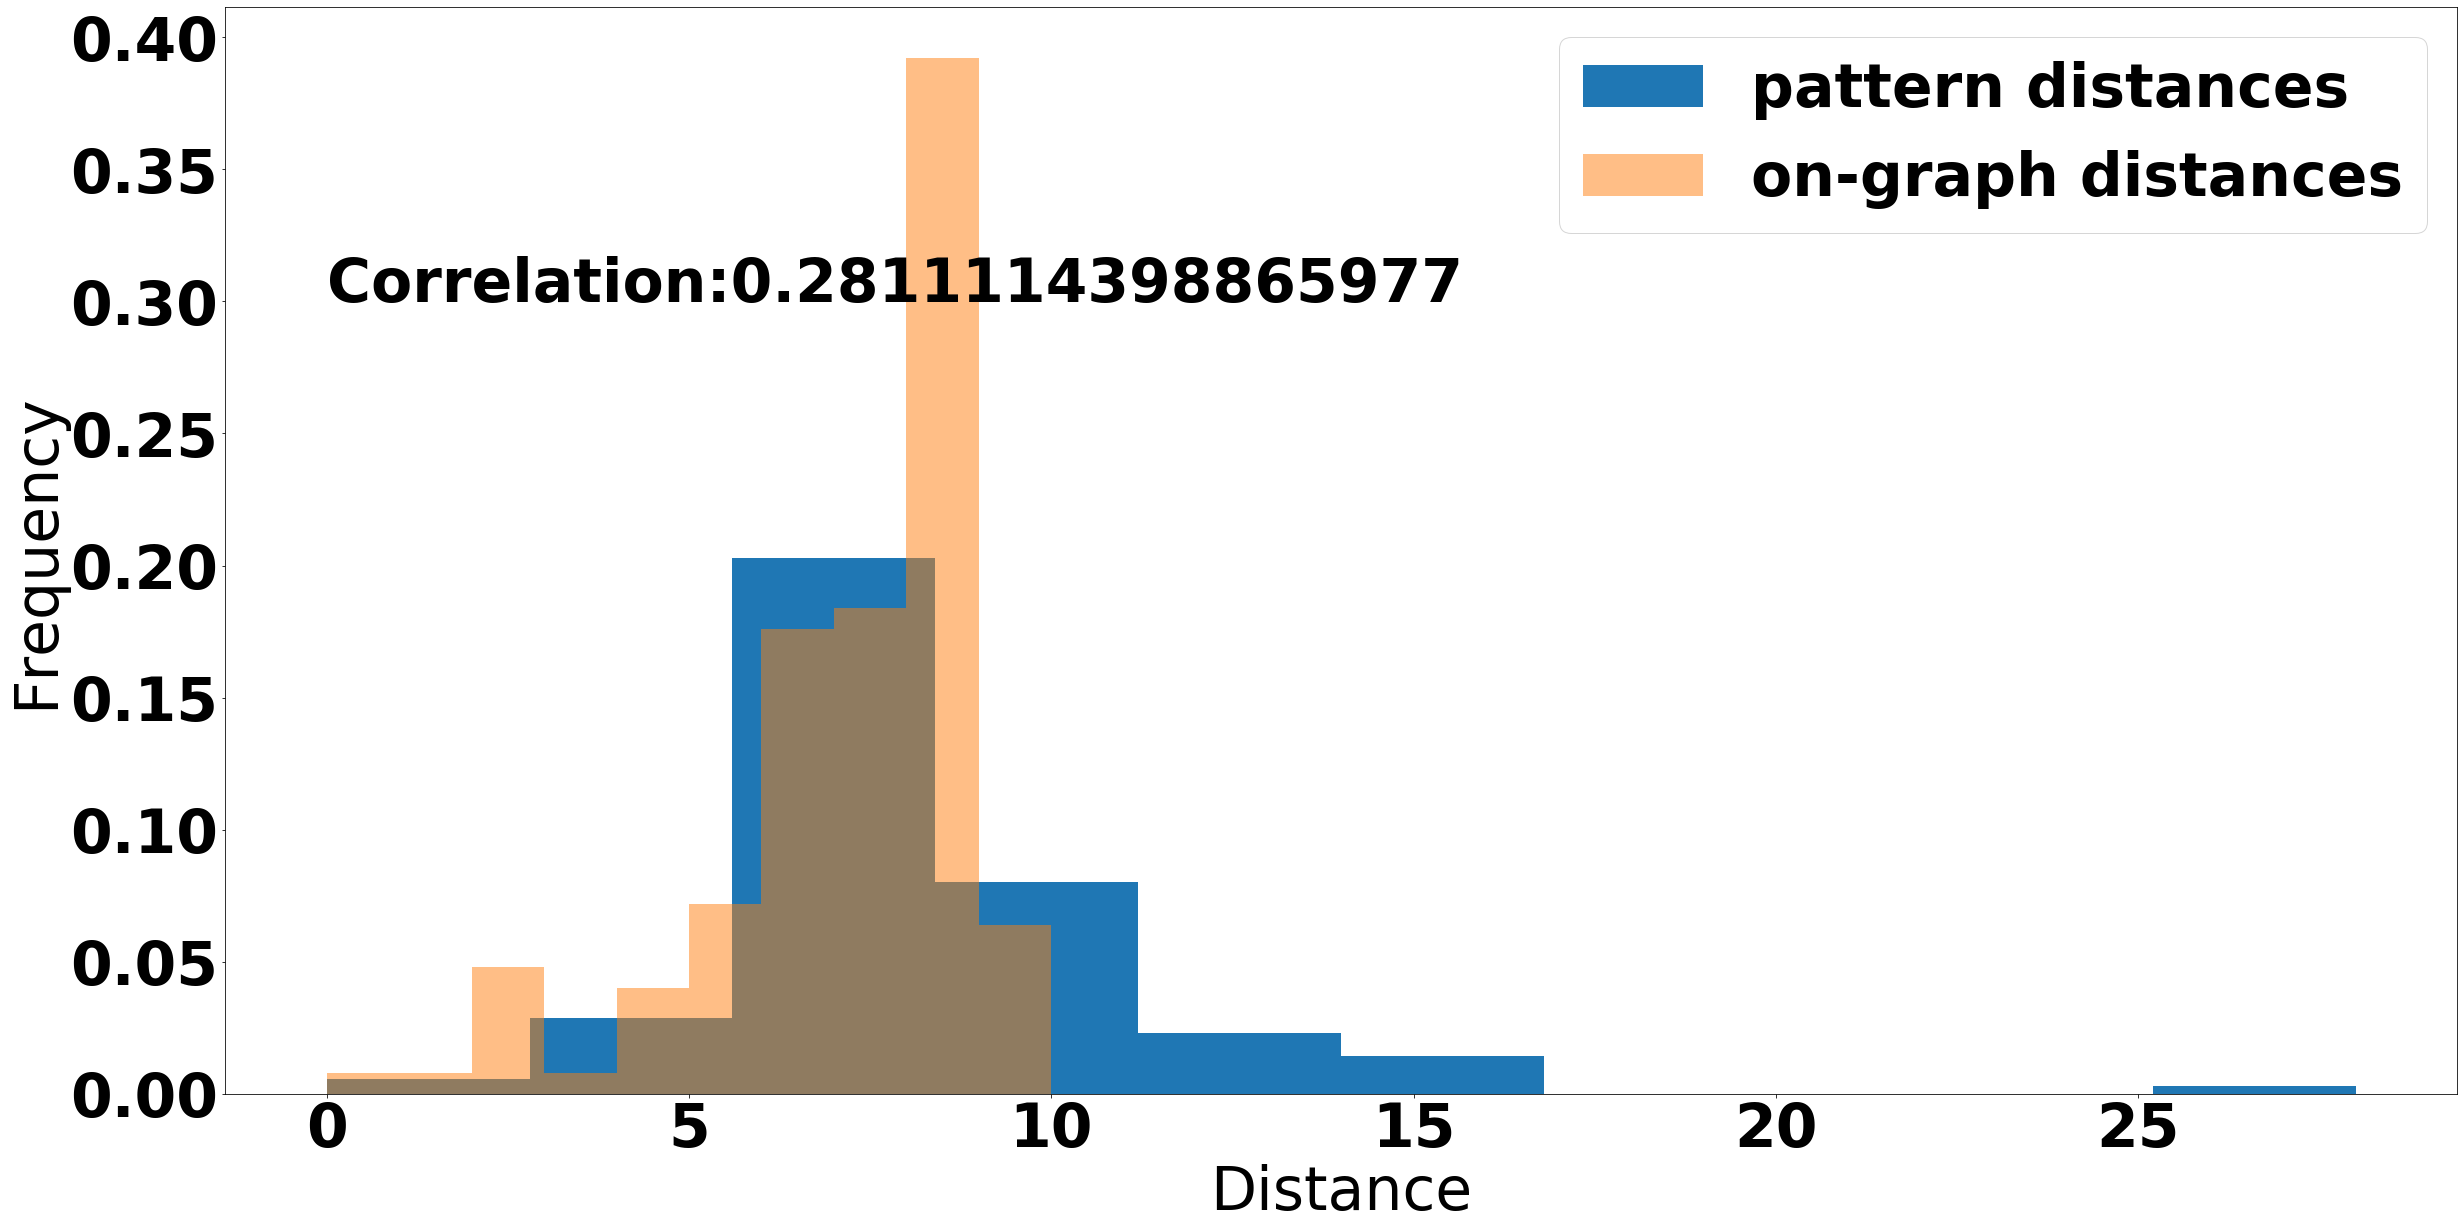

In [12]:
plt.figure(figsize=(40,20))
plt.hist(all_pattern_distances,label='pattern distances',density=True)
plt.hist(all_graph_distances,label='on-graph distances',alpha=0.5,density=True)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.text(s='Correlation:'+ str(np.corrcoef(all_pattern_distances,all_graph_distances)[0,1]),x=0,y=0.3)
#plt.savefig('./outputs/demonstrations/hist_all_pattern_and_graph_distances.png')
plt.show()

/home/k1801311/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:844: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/k1801311/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/home/k1801311/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:1959: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

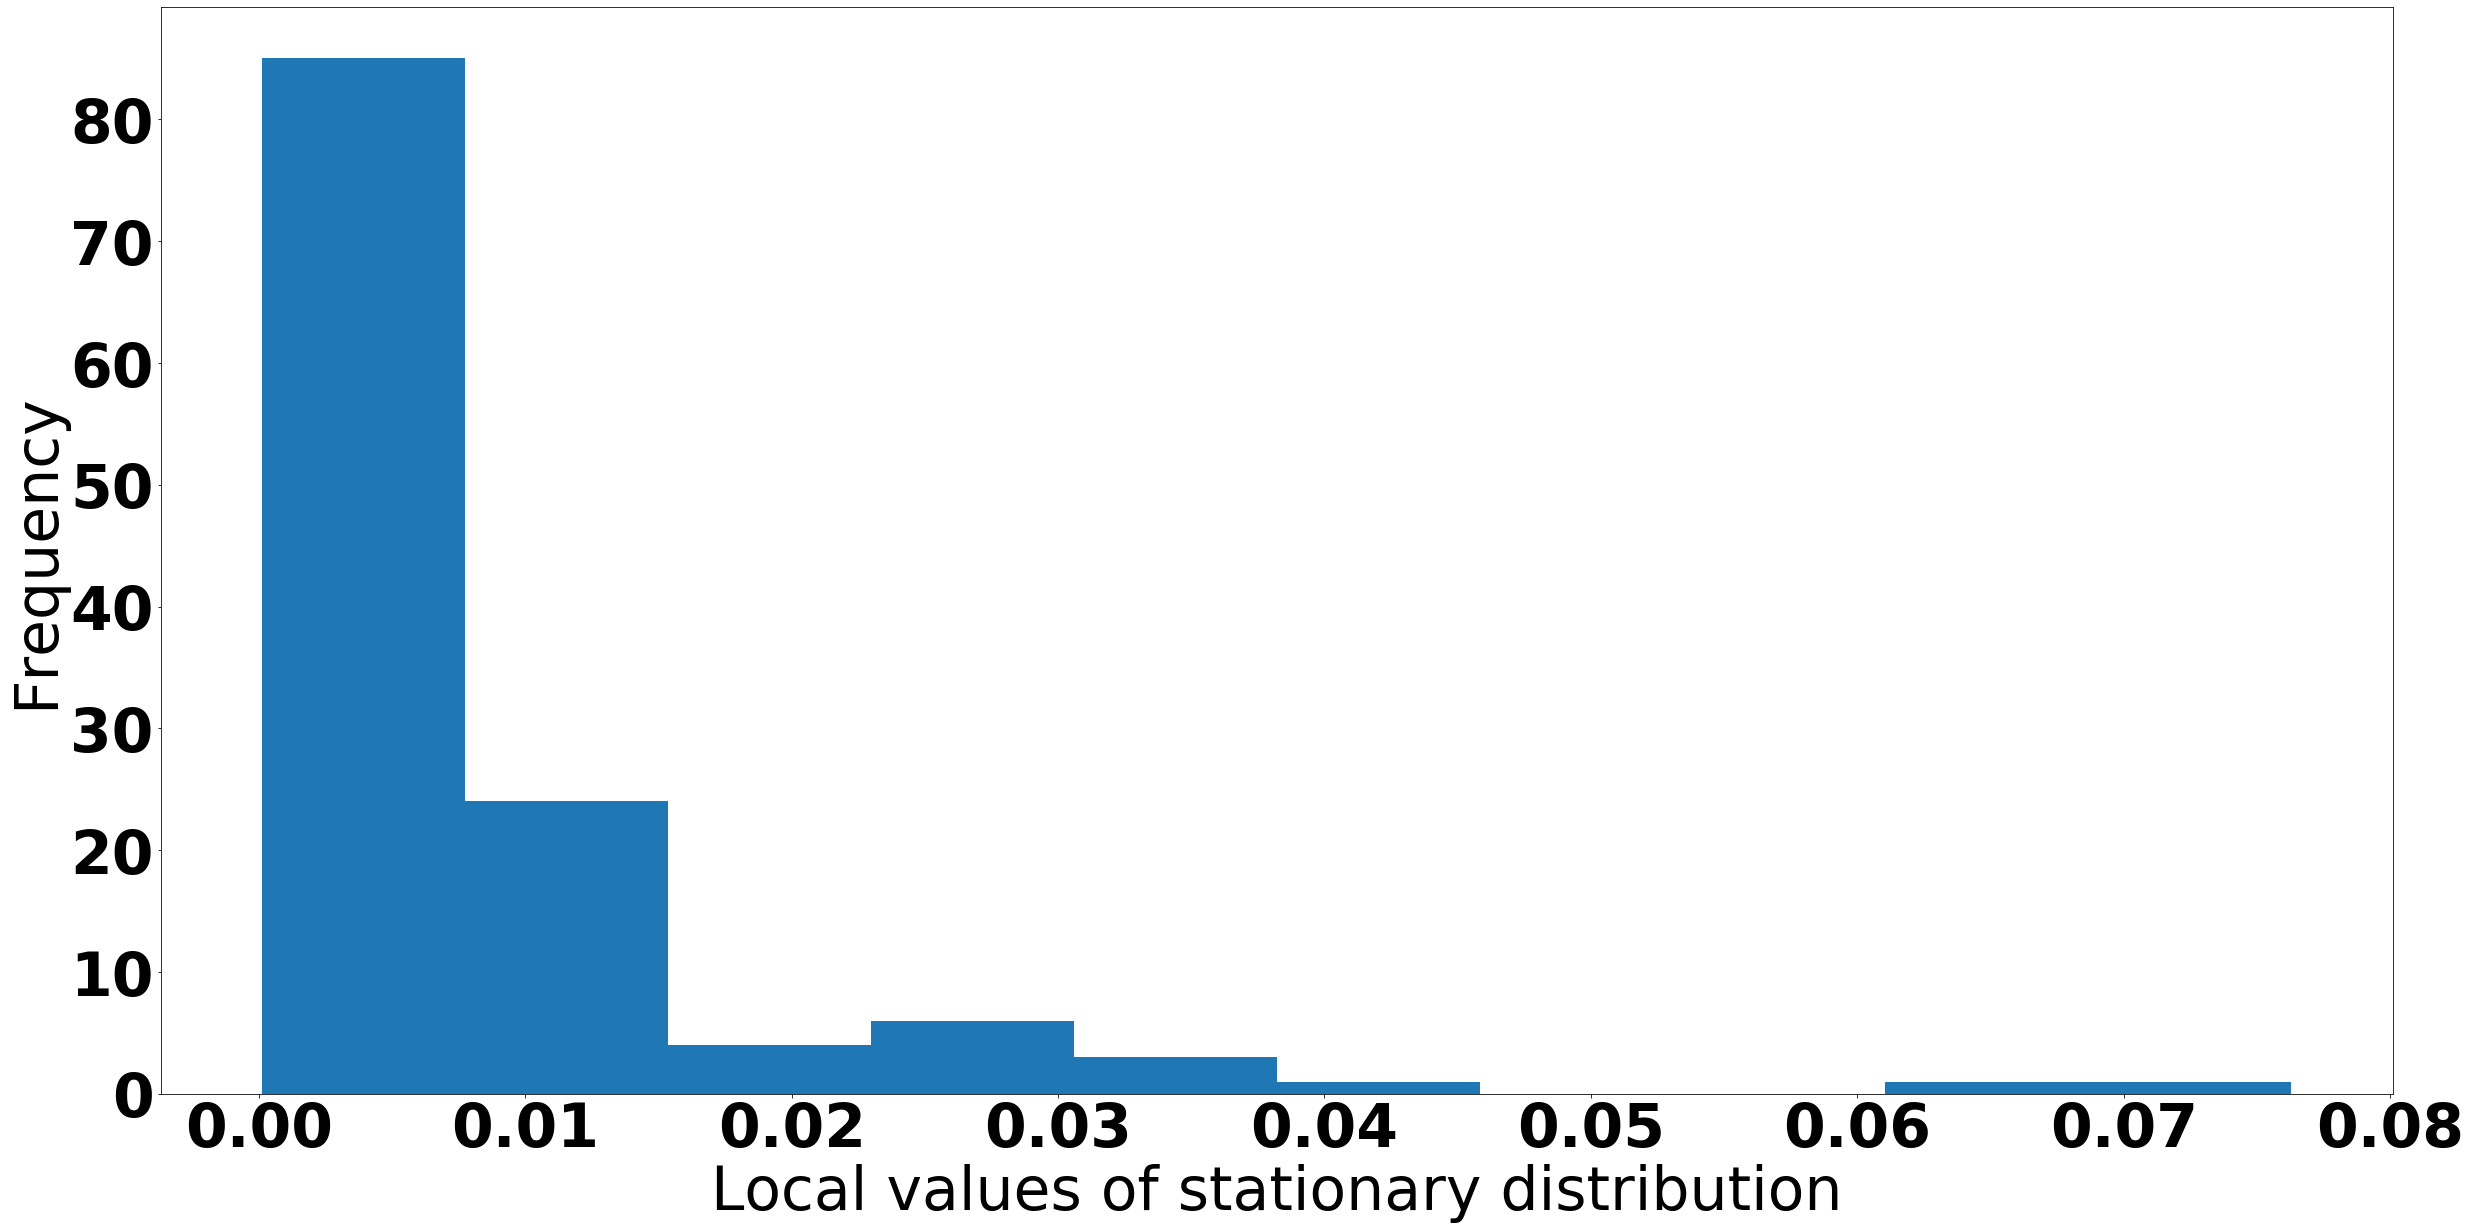

In [13]:
f,ax=plt.subplots(figsize=(40,20))
#Histogram of stationary distribution values
pi=utils.largest_eigenvector(G,'prob')
plt.hist(pi)
plt.xlabel('Local values of stationary distribution')
plt.ylabel('Frequency')
plt.text(s='$\pi$(target)='+str(pi[G.target_node]),x=0.3,y=0.8,transform = ax.transAxes)
#plt.savefig('./outputs/demonstrations/hist_stationary_probs.png')
plt.show()

In [ ]:
pi[G.root]

In [ ]:
f,ax=plt.subplots(figsize=(40,20))
pi_leaves=pi[utils.leaves(G.hierarchy_backup)]
plt.hist(pi_leaves,density=False)
print(len(pi_leaves))
plt.xlabel('Leaf values of stationary distribution')
plt.ylabel('Frequency')
#plt.text(s='$\pi$(target)='+str(pi[G.target_node]),x=0.3,y=0.8,transform = ax.transAxes)
#plt.savefig('./outputs/demonstrations/hist_stationary_probs_leaves.png')
plt.show()

In [ ]:
#Probabilites along the shortest path to the target node
target_path_weight=np.prod( pi[ list(nx.ancestors(G.hierarchy_backup,G.target_node)) ] )
for x in nx.ancestors(G.hierarchy_backup,G.target_node):
    print(pi[x])
print(target_path_weight)

In [ ]:
#Weights of shortest paths from root to leaves
path_weights=[]
for leaf in utils.leaves(G.hierarchy_backup):
    path_weights.append( np.prod( pi[list(nx.ancestors(G.hierarchy_backup,leaf) )] ) )
path_weights

Testing an idea for a "symmetrised" (as in "can be negative") transient process beginning at zero:

In [ ]:
#define transition probabilities
import numpy as np


def probs(k,gamma):
    if k==0:
        return np.array([0.5,0,0.5])
    else:
        out=np.array([gamma/(abs(k-1)+1),(1-gamma)/(abs(k)+1),gamma/(abs(k+1)+1)])
        return out/np.sum(out)

In [ ]:
#Consider the transient random walker starting from 0
gamma=0.2
d=[0]
last=0
for _ in range(50000):
    current=np.random.choice([last-1,last,last+1],p=probs(last,gamma))
    d.append(current)
    last=current.copy()

In [ ]:
plt.figure(figsize=(40,20))
plt.plot([abs(x) for x in d])
plt.show()

In [ ]:
plt.figure(figsize=(40,20))
plt.hist(d,bins=40)
plt.show()